In [1]:
using DiffEqBase, OrdinaryDiffEq,
      Sundials, Plots, ODEInterface, ODEInterfaceDiffEq,
      LSODA, ModelingToolkit, DiffEqDevTools
include("potentials/inversepower.jl")
include("minimumassign/minimumassign.jl")
include("utils/utils.jl")

generate_random_coordinates (generic function with 1 method)

In [2]:
natoms = 16
radii_arr = generate_radii(0, natoms, 1.,1.4, 0.05, 0.05*1.4)
dim = 2.0
phi = 0.9
power = 2.5
eps = 1

length = get_box_length(radii_arr, phi, dim)

potential = InversePowerPeriodic(2, power, eps, [length, length],  radii_arr)

coords = generate_random_coordinates(length, natoms, dim)

tol = 1e-4

odefunc = gradient_problem_function_all!(potential)
tspan = (0, 100.)

32.0


(0, 100.0)

In [3]:
prob = ODEProblem{true}(odefunc, coords, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 32-element Vector{Float64}:
 5.26547250894492
 7.938874364818388
 8.8488166077642
 7.019171417218076
 4.290953061383954
 0.5702411025692091
 3.228738571851173
 7.018362820827343
 0.3944484188752373
 2.4502458959085827
 0.6111925985564105
 1.4321652375868488
 5.534368996139129
 ⋮
 7.33217401704462
 0.3231634405273944
 4.431363975462053
 8.22158712979583
 8.701529612544768
 7.324813082841852
 1.1367116491304365
 1.0447858894419346
 0.7273850491669233
 7.101313208494044
 0.9584178814432026
 7.66271463627935

In [4]:
@time sol = solve(prob, CVODE_BDF(), abstol=1/10^12, reltol=1/10^12)
sol.destats

  6.622646 seconds (32.59 M allocations: 2.405 GiB, 5.48% gc time)


DiffEqBase.DEStats
Number of function 1 evaluations:                  3119
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    462
Number of linear solves:                           0
Number of Jacobians created:                       40
Number of nonlinear solver iterations:             3116
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          2021
Number of rejected steps:                          205

In [5]:
BLAS.set_num_threads(1)
abstols = 1.0 ./ 10.0 .^ (3:8)
reltols = 1.0 ./ 10.0 .^ (3:8);
setups = [
          Dict(:alg=>Rosenbrock23(autodiff=false)),
          Dict(:alg=>TRBDF2(autodiff=false)),
          Dict(:alg=>QNDF(autodiff=false)),
          #Dict(:alg=>rodas()),
          Dict(:alg=>CVODE_BDF()),
          #Dict(:alg=>Rodas4(autodiff=false)),
          #Dict(:alg=>Rodas5(autodiff=false)),
          Dict(:alg=>KenCarp4(autodiff=false)),
          Dict(:alg=>KenCarp47(autodiff=false)),
          #Dict(:alg=>RadauIIA5(autodiff=false)),
          #Dict(:alg=>lsoda()),
          ]

6-element Vector{Dict{Symbol, V} where V}:
 Dict{Symbol, Rosenbrock23{0, false, DefaultLinSolve, DataType}}(:alg => Rosenbrock23{0, false, DefaultLinSolve, DataType}(DefaultLinSolve(nothing, nothing), Val{:forward}))
 Dict{Symbol, TRBDF2{0, false, DefaultLinSolve, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}, DataType}}(:alg => TRBDF2{0, false, DefaultLinSolve, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}, DataType}(DefaultLinSolve(nothing, nothing), NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}(1//100, 10, 1//5, 1//5), Val{:forward}, true, :linear, :PI))
 Dict{Symbol, QNDF{5, 0, false, DefaultLinSolve, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}, DataType, Nothing, Nothing, NTuple{5, Float64}}}(:alg => QNDF{5, 0, false, DefaultLinSolve, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}, DataType, Nothing, Nothing, NTuple{5, Float64}}(Val{5}(), DefaultLinSolve(nothing, nothing), NLNewton{Rational{Int64}, Rational{Int

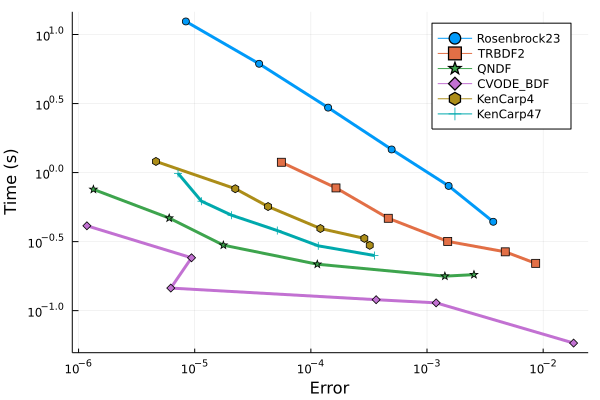

In [6]:
wp2 = WorkPrecisionSet(prob,abstols,reltols,setups;error_estimate=:l2,
                      appxsol=sol,maxiters=Int(1e5),numruns=1)
plot(wp2)

In [14]:
reltol = 1/10^5
abstol = reltol

1.0e-5

In [15]:
odefunc = gradient_problem_function_all!(potential)
tspan = (0, 100.)

(0, 100.0)

In [16]:
prob = ODEProblem(odefunc, coords, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 32-element Vector{Float64}:
 5.26547250894492
 7.938874364818388
 8.8488166077642
 7.019171417218076
 4.290953061383954
 0.5702411025692091
 3.228738571851173
 7.018362820827343
 0.3944484188752373
 2.4502458959085827
 0.6111925985564105
 1.4321652375868488
 5.534368996139129
 ⋮
 7.33217401704462
 0.3231634405273944
 4.431363975462053
 8.22158712979583
 8.701529612544768
 7.324813082841852
 1.1367116491304365
 1.0447858894419346
 0.7273850491669233
 7.101313208494044
 0.9584178814432026
 7.66271463627935

In [17]:
@time sol = solve(prob, CVODE_BDF(), abstol=abstol, reltol=reltol)

  0.121482 seconds (1.07 M allocations: 91.020 MiB, 4.62% compilation time)


retcode: Success
Interpolation: 3rd order Hermite
t: 118-element Vector{Float64}:
   0.0
   0.010070503526980286
   0.02014100705396057
   0.041611539993145846
   0.06308207293233112
   0.08455260587151639
   0.12348610001601937
   0.2134207226908711
   0.30335534536572284
   0.3932899680405746
   0.48322459071542634
   0.5731592133902781
   0.6630938360651298
   ⋮
  67.69546731234264
  70.8278433021203
  73.96021929189796
  77.09259528167561
  80.22497127145327
  83.35734726123093
  86.48972325100858
  89.62209924078624
  92.7544752305639
  95.88685122034155
  99.01922721011921
 100.0
u: 118-element Vector{Vector{Float64}}:
 [5.26547250894492, 7.938874364818388, 8.8488166077642, 7.019171417218076, 4.290953061383954, 0.5702411025692091, 3.228738571851173, 7.018362820827343, 0.3944484188752373, 2.4502458959085827  …  4.431363975462053, 8.22158712979583, 8.701529612544768, 7.324813082841852, 1.1367116491304365, 1.0447858894419346, 0.7273850491669233, 7.101313208494044, 0.9584178814432026

In [18]:
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  146
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    16
Number of linear solves:                           0
Number of Jacobians created:                       3
Number of nonlinear solver iterations:             143
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          115
Number of rejected steps:                          2

In [19]:
@time sol = solve(prob, QNDF(autodiff=false), abstol=abstol, reltol=reltol)

  0.569166 seconds (2.93 M allocations: 257.805 MiB, 12.25% gc time, 57.87% compilation time)


retcode: Success
Interpolation: 3rd order Hermite
t: 98-element Vector{Float64}:
   0.0
   1.5521839177574223e-6
   3.1043678355148446e-6
   4.656551753272267e-6
   2.017839093084649e-5
   3.5700230108420715e-5
   5.122206928599494e-5
   6.674390846356916e-5
   0.0002219623002393114
   0.0003771806920150536
   0.0005323990837907958
   0.000687617475566538
   0.0022398013933239602
   ⋮
  65.97881374007433
  69.15173205064744
  72.32465036122055
  75.49756867179366
  78.67689762831682
  81.85622658483999
  85.03555554136315
  88.21488449788632
  91.39421345440948
  94.68234962351634
  97.97048579262321
 100.0
u: 98-element Vector{Vector{Float64}}:
 [5.26547250894492, 7.938874364818388, 8.8488166077642, 7.019171417218076, 4.290953061383954, 0.5702411025692091, 3.228738571851173, 7.018362820827343, 0.3944484188752373, 2.4502458959085827  …  4.431363975462053, 8.22158712979583, 8.701529612544768, 7.324813082841852, 1.1367116491304365, 1.0447858894419346, 0.7273850491669233, 7.10131320849404

In [20]:
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  477
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    20
Number of linear solves:                           278
Number of Jacobians created:                       3
Number of nonlinear solver iterations:             258
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          97
Number of rejected steps:                          1

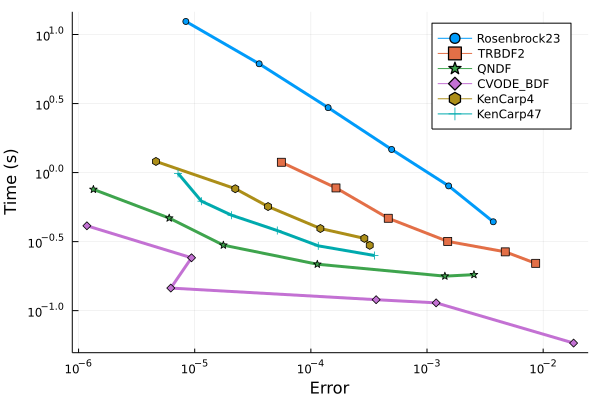

In [21]:
plot(wp2, fmt=:png)